In [1]:
import pandas as pd
import numpy as np
import pandas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD,Adam

In [2]:
imputed=pd.read_csv (r'C:\Users\Manos\OneDrive/Thesis Final/LSTM/all_nurse_with_FI_imputed.tab',sep='\t',low_memory=False)

In [3]:
imputed.shape

(29912, 26)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
#dont use it on idauniq
scaler.fit(imputed.iloc[:,1:-1])

MinMaxScaler()

In [5]:
scaled=scaler.transform(imputed.iloc[:,1:-1])

In [6]:
scaled.shape

(29912, 24)

In [7]:
imputed.shape

(29912, 26)

In [8]:
X=scaled
y=imputed.iloc[:,-1]

In [9]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=32,train_size=0.95)

In [10]:
opt = Adam(learning_rate=0.00005)
model = Sequential()
model.add(Dense(24,  activation='relu',input_dim=24)) # Hidden 1
#model.add(Dropout(0.1))
model.add(Dense(5, activation='relu')) # Hidden 2
#model.add(Dense(10, activation='relu')) # Hidden 3
model.add(Dropout(0.2))
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer=opt)


In [11]:
history=model.fit(X_train, y_train, epochs=50,validation_split=0.05)

Epoch 1/50
844/844 [==============================] - 1s 1ms/step - loss: 0.0306 - val_loss: 0.0204
Epoch 2/50
844/844 [==============================] - 1s 786us/step - loss: 0.0203 - val_loss: 0.0183
Epoch 3/50
844/844 [==============================] - 1s 783us/step - loss: 0.0183 - val_loss: 0.0169
Epoch 4/50
844/844 [==============================] - 1s 897us/step - loss: 0.0168 - val_loss: 0.0158
Epoch 5/50
844/844 [==============================] - 1s 943us/step - loss: 0.0157 - val_loss: 0.0153
Epoch 6/50
844/844 [==============================] - 1s 934us/step - loss: 0.0152 - val_loss: 0.0151
Epoch 7/50
844/844 [==============================] - 1s 1ms/step - loss: 0.0149 - val_loss: 0.0149
Epoch 8/50
844/844 [==============================] - 1s 924us/step - loss: 0.0148 - val_loss: 0.0147
Epoch 9/50
844/844 [==============================] - 1s 960us/step - loss: 0.0146 - val_loss: 0.0146
Epoch 10/50
844/844 [==============================] - 1s 1ms/step - loss: 0.0146 - va

<function matplotlib.pyplot.show(close=None, block=None)>

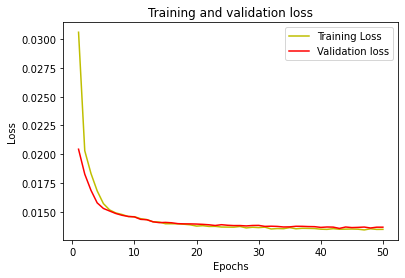

In [12]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs= range(1,len(loss)+1)
plt.plot(epochs, loss, 'y',label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(r'C:\Users\Manos\Desktop\DNN loss Function.png')
plt.show

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error,mean_squared_error
mse=mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
adjr2=1-(((1-r2)*(len(y)-1))/((len(y)-X.shape[1]-1)))
print('MSE: %.3f' % mse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)
print('r2: %.3f' % r2)
print('adjr2: %.3f' % adjr2)

MSE: 0.012
MAE: 0.082
MAPE: 28061620512342.723
r2: 0.189
adjr2: 0.188


In [15]:
LSTM_prediction=pd.read_csv (r'C:\Users\Manos\Desktop\Lstm Prediction',sep='\t',low_memory=False)


In [16]:
LSTM_prediction.shape

(564, 25)

In [17]:
scaledLSTM_prediction=scaler.transform(LSTM_prediction.iloc[:,1:])#scale dataset

In [18]:
predLSTM_prediction=model.predict(scaledLSTM_prediction)#

In [19]:
predFI_from_LSTM= pd.DataFrame(predLSTM_prediction, columns = ['FI'])
predFI_from_LSTM.insert(0,'idauniq',LSTM_prediction.iloc[:,0])
predFI_from_LSTM.to_csv(r'C:\Users\Manos\Desktop\DNN_FI_LSTM',sep='\t',index=False)

In [20]:
predFI_from_LSTM

,idauniq,FI
0,111219.0,0.123089
1,107792.0,0.117470
2,118271.0,0.095496
3,108337.0,0.140778
4,117583.0,0.117645
...,...,...
559,105129.0,0.122546
560,120021.0,0.158177
561,120041.0,0.123288
562,108845.0,0.144292
